In [1]:
# Install necessary libraries
!pip install pandas scikit-learn

In [2]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [3]:
# Load the dataset with specified encoding and skip bad lines
df = pd.read_csv('/content/urlset2 (2).csv')

In [4]:
# Display the first few rows of the dataset
df.head(10)

,domain,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem,label,Unnamed: 14
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,10000000,1,0,18.0,107.611111,107.277778,0.0,0.0,0.0,0.0,0.8,0.795729,1,NaN
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,10000000,0,0,11.0,150.636364,152.272727,0.0,0.0,0.0,0.0,0,0.768577,1,NaN
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,10000000,0,0,14.0,73.500000,72.642857,0.0,0.0,0.0,0.0,0,0.726582,1,NaN
3,mail.printakid.com/www.online.americanexpress....,10000000,0,0,6.0,562.000000,590.666667,0.0,0.0,0.0,0.0,0,0.85964,1,NaN
4,thewhiskeydregs.com/wp-content/themes/widescre...,10000000,0,0,8.0,29.000000,24.125000,0.0,0.0,0.0,0.0,0,0.748971,1,NaN
5,smilesvoegol.servebbs.org/voegol.php,10000000,0,0,2.0,223.500000,234.000000,0.0,0.0,0.0,0.0,0,0.852227,1,NaN
6,premierpaymentprocessing.com/includes/boleto-2...,10000000,0,0,4.0,119.000000,121.500000,0.0,0.0,0.0,0.0,0,0.853565,1,NaN
7,myxxxcollection.com/v1/js/jih321/bpd.com.do/do...,10000000,0,0,4.0,160.500000,157.250000,0.0,0.0,0.0,0.0,0,0.777622,1,NaN
8,super1000.info/docs,10000000,0,0,1.0,21.000000,13.000000,0.0,0.0,0.0,0.0,0,0.36,1,NaN
9,horizonsgallery.com/js/bin/ssl1/_id/www.paypal...,10000000,0,0,16.0,142.375000,142.500000,0.0,0.0,0.0,0.0,0,0.803006,1,NaN


In [5]:
df.isnull().sum()

domain               4
ranking             56
mld_res             75
mld.ps_res          86
card_rem            87
ratio_Rrem          87
ratio_Arem          87
jaccard_RR          88
jaccard_RA          89
jaccard_AR          90
jaccard_AA          91
jaccard_ARrd        91
jaccard_ARrem       93
label               97
Unnamed: 14      30913
dtype: int64

In [6]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [7]:
df.isnull().sum()

domain            4
ranking          56
mld_res          75
mld.ps_res       86
card_rem         87
ratio_Rrem       87
ratio_Arem       87
jaccard_RR       88
jaccard_RA       89
jaccard_AR       90
jaccard_AA       91
jaccard_ARrd     91
jaccard_ARrem    93
label            97
dtype: int64

In [8]:
from sklearn.model_selection import train_test_split

# Assuming 'label' is your target variable and the rest are features
X = df.drop('label', axis=1)  # Select all columns except 'label' as features
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [9]:
# Identify string-based columns
string_columns = X.select_dtypes(include=['object']).columns

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [11]:
# Identify string (object) columns
string_columns = df.select_dtypes(include=['object']).columns

In [12]:
# Apply Label Encoding or One-Hot Encoding
# Here we use Label Encoding for simplicity, One-Hot Encoding can be used as well
label_encoders = {}
for col in string_columns:
    # Convert the column to string type to ensure uniformity
    df[col] = df[col].astype(str)  #This will convert all values to strings
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

<ipython-input-12-acf6ba858837>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(str)  #This will convert all values to strings


In [13]:
# Split the dataset into features (X) and target (y)

X = df.iloc[:, :-1]
y = df.iloc[:, -1]


In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
# Impute missing values using SimpleImputer
!pip install scikit-learn
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [16]:
# Assuming 'df' is your DataFrame with potential missing values
imputer = SimpleImputer(strategy='most_frequent')
df_imputed = pd.DataFrame(imputer.fit_transform(df))
df_imputed.columns = df.columns


X = df_imputed.iloc[:, :-1]
y = df_imputed.iloc[:, -1]

In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
# Decision Tree
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train, y_train)
y_pred_dec_tree = dec_tree.predict(X_test)
dec_tree_accuracy = accuracy_score(y_test, y_pred_dec_tree)

In [20]:
# Display the accuracies
print(f'Logistic Regression Accuracy: {log_reg_accuracy}')
print(f'Decision Tree Accuracy: {dec_tree_accuracy}')

Logistic Regression Accuracy: 0.9996765498652291
Decision Tree Accuracy: 1.0


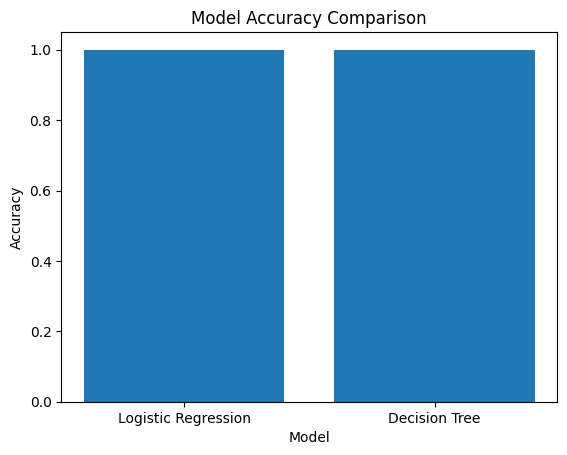

In [21]:

import matplotlib.pyplot as plt

# Prepare data
x = ['Logistic Regression', 'Decision Tree']
y = [log_reg_accuracy, dec_tree_accuracy]

# Plot the bar chart
plt.bar(x, y)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()
